In [2]:
# Import the Library
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [3]:
# Create Empty list
dates = []
prices = []

In [4]:
# Getting and clean, split data
def stock_data_get(stock_file):
    with open(stock_file, 'r') as file_csv:
         csv_var = csv.reader(file_csv)
# Remove the First row i.e name of the columns
         next(csv_var)
# Analyze each line populate the date and price list after cleaning 
         for line in csv_var:
             dates.append(int(line[0].split('-')[0]))
             prices.append(float(line[4]))
    return

In [5]:
# Model Prediction
def model_pred(dates, prices, date):
        dates = np.reshape(dates, (len(dates), 1))
        
        model_linear = SVR(kernel = 'linear', C = 1e3)
        model_poly = SVR(kernel = 'poly', C = 1e3, degree = 2)
        model_eclud = SVR(kernel = 'rbf', C = 1e3, gamma = 0.1)
      
        model_linear.fit(dates, prices)
        model_poly.fit(dates, prices)
        model_eclud.fit(dates, prices)
         
        plt.scatter(dates, prices, color = 'black', label = 'Past Data')
        plt.plot(dates, model_eclud.predict(dates), color = 'red', label = 'RBF_Mod')
        plt.plot(dates, model_linear.predict(dates), color = 'green', label = 'Lin_Mod')
        plt.plot(dates, model_poly.predict(dates), color = 'blue', label = 'Poly_Mod')
    
        plt.xlabel('Dates')
        plt.ylabel('Prices')
        plt.title('Stock Price Prediction')
        plt.legend()
        plt.show()
     
        return model_eclud.predict(date)[0], model_linear.predict(date)[0], model_poly.predict(date)[0]

In [6]:
# Getting the Data
stock_data_get('apple.csv')
# Price Predict using closing col

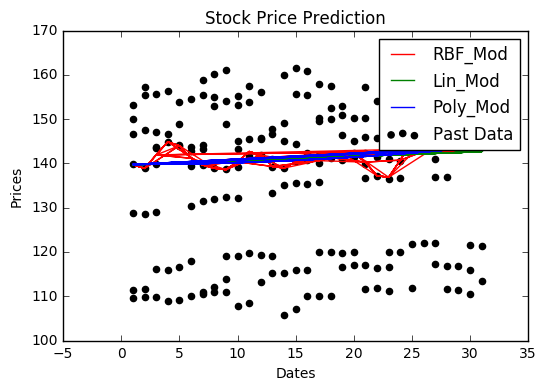

(143.57951396098701, 142.44941177119642, 143.25890096712692)


In [7]:
# Predict the price from each model used
model_pred = model_pred(dates, prices, 29) 
print(model_pred)